최규빈 교수님 통계전산 수업 정리

수업에서는 Julia를 사용하지만 필요한 부분만 Python으로 바꾸어 작성하였다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps

# 통계 전산

## 로드맵

`-` 통계

- 일반통계학 개념의 백업
- 여러가지 분포리뷰, 어떠한 분포에서 샘플을 추출하는 방법
- 수렴
- 추정 및 검정
- 부트스트랩
- 선형회귀분석

`-` 선형대수학

- 백터공간, rank
- 직교행렬, 사영행렬, 양정치행렬...
- 매트릭스를 해석하는 방식 (이미지, 데이터프레임, 변환)...
- 분해이론: 고유값분해, SVD
- 벡터나 매트릭스의 미분..

## 베르누이

## 이항분포

1회당 성공확률이 p. n번을 시행해서 성공한 횟수가 X. 이를 N번 반복해서 나온 성공값들을 분포로 나타낸게 이항분포?

## 포아송분포 ($X \sim Poi(\lambda)$)

`-` 포아송분포의 요약

- X의의미: 발생횟수의 평균이 λ인 분포에서 실제 발생횟수를 X라고 한다.

- X의범위: 발생안할수도 있으므로 X=0이 가능. 따라서 X=0,1,2,3,...

- 파라메터의 의미와 범위: λ = 평균적인 발생횟수; λ>0.

- pdf:

- mgf:

- E(X): λ

- V(X): λ

단위시간동안 어떤 이벤트가 발생했는데, 그 이벤트의 횟수가 포아송.

### [포아송분포의 예시](https://www.statology.org/poisson-distribution-real-life-examples/#:~:text=Example%201%3A%20Calls%20per%20Hour,receives%2010%20calls%20per%20hour.)

- 콜센타에 걸려오는 전화의 수, 1시간동안

- 레스토랑에 방문하는 손님의 수, 하루동안

- 웹사이트를 방문하는 사람의 수, 1시간동안

- 파산하는 사람의 수, 1달동안

- 네트워크의 끊김 수, 1주일동안

### How to generate it?

평균 3인 포아송분포에서 100개 샘플을 뽑는 방법

방법1)

In [16]:
pois = np.random.poisson(3, 100)
pois

array([ 3,  4,  0,  7,  1,  3,  3,  5,  3,  2,  2,  6,  3,  5,  3,  2,  1,
        4,  4,  2,  8,  3,  3,  3,  2,  0,  3,  5,  2,  2,  2,  2,  5,  4,
        4,  7,  3,  5,  6,  2,  2,  1,  7,  3,  3,  1,  5,  5,  5,  6,  2,
        3,  3,  3,  2,  5,  2,  6,  2,  5,  4,  0,  3,  4,  2,  0,  3,  3,
        3,  4,  2,  3,  1,  1,  1,  5,  6,  2,  1,  3,  3,  3,  2,  7,  4,
        2,  2,  4,  3,  1,  5,  2, 10,  6,  2,  4,  0,  3,  2,  1])

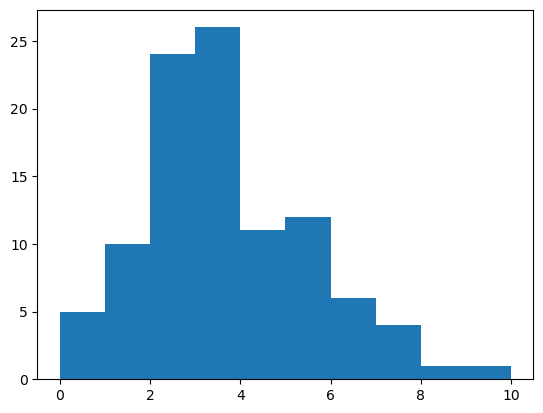

In [17]:
plt.hist(pois);

# bar plot으로 나타내는 법
# unique_values, count = np.unique(pois, return_counts=True)
# plt.bar(unique_values, count)
# ax = plt.gca()
# ax.set_xlim([-1,11])
# plt.title("pois")
# plt.xticks(np.arange(0,11,1)); # x축 1간격

방법2) 이항분포의 포아송근사를 이용

이론: 이항분포에서 (1) $n→\infty$ (2) $p→0$ (3) $np=\lambda$ 이면 이것은 평균이 $\lambda$ 인 포아송분포로 근사함.

평균이 $\lambda$ 인 포아송분포는 $B(n,\frac{\lambda}{n})$ 로 근사할 수 있다. 이때
$n$이 커질수록 더 정확해짐.

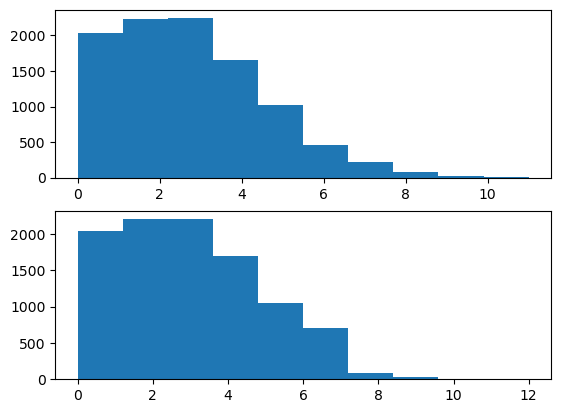

In [6]:
N = 10000
λ = 3
n = 10000
p = λ/n
X = np.random.binomial(n, p, N)
Y = np.random.poisson(λ, N)

fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax1.hist(X);
ax2.hist(Y);

방법3) 균등분포 → 베르누이 → 이항분포 ≈ 포아송

- 1분동안 맥도날드에 평균 3명이 온다고 생각
- 이건 사실 1초에 성공확률이 0.05인 베르누이 시행을 1번 시행하여 1분동안 총 60회 반복한 것으로 이해할 수 있음.
- 좀 더 세밀하게는 0.001초에 성공확률이 5.0e-5인 베르누이 시행을 1번 시행하여 1분동안 총 60000회 반복한 것으로도 이해할 수 있음. (무한반복 가능)
- 느낌: 하여튼 (1) "엄청 작은 시간"에 (2) "엄청 작은 확률"의 베르누이 시행이 (3) "엄청 많이 독립적으로 반복" 되는 느낌을 기억!! = 포아송 프로세스


In [7]:
λ=3
n=60000
p=λ/n
Δt = (60/n) # 단위가 60초니까 60

N = 10000
X = [sum(np.random.uniform(0,1,n)<p) for i in range(N)]

Text(0.5, 1.0, 'Poisson')

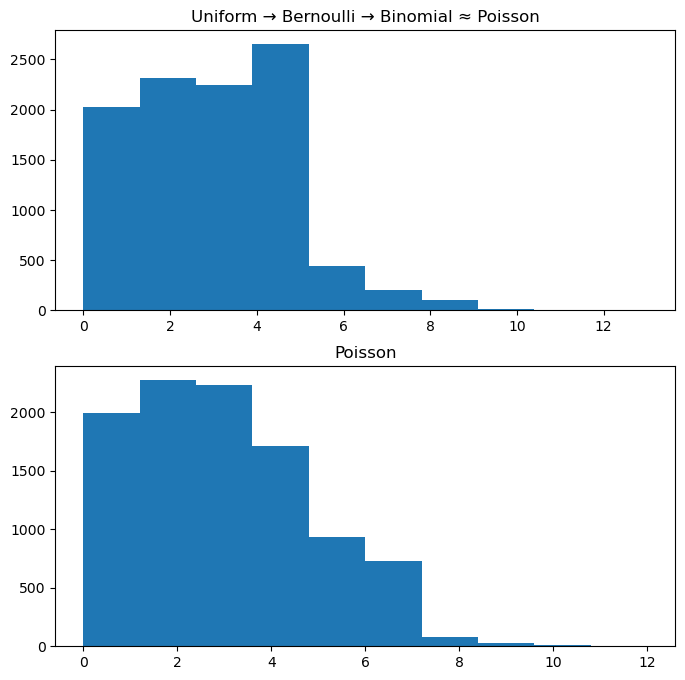

In [8]:
fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,8))

ax1.hist(X)
ax2.hist(np.random.poisson(λ, N));

ax1.set_title("Uniform → Bernoulli → Binomial ≈ Poisson")
ax2.set_title("Poisson")

방법4) 균등분포 → inverse cdf method를 이용해서 생성할 수 있음.

> `-` Inverse CDF Method??
> 모든 확률 분포의 누적 분포 함수(cumulative distribution function, cdf)가 균등분포를 따른다는 성질을 이용한 방법

> 보통 난수를 일으킬 때에는 균등분포 난수 생성기를 이용하여 난수를 일으킨다.
> 그런데 만약 어떤 특정한 함수를 따르는 난수를 만들어내고 싶다면??
> Inverse CDF Method를 사용하면 된다. 추후 수식 관련하여 자세히 다루기.

- 포아송 분포의 합은 다시 포아송분포가 된다.

- 이론: $X \sim Poi(\lambda_1), Y \sim Poi(\lambda_2), X \bot Y \Rightarrow X+Y\sim Poi(\lambda_1+\lambda_2)$
- 의미?: (1) 1분동안 맥도날드 매장에 들어오는 남자의 수는 평균이 5인 포아송 분포를 따름. (2) 1분동안 맥도날드 매장에 들어오는 여자의 수는 평균이 4.5인 포아송 분포를 따름. (3) 남자와 여자가 매장에 오는 사건은 독립 $\rightarrow$ 1분동안 맥도날드 매장에 오는 사람은 평균 9.5인 포아송 분포를 따른다는 의미

In [18]:
N = 1000
X = np.random.poisson(5, N)
Y = np.random.poisson(4.5, N)

p1 = X+Y
p2 = np.random.poisson(9.5, N)

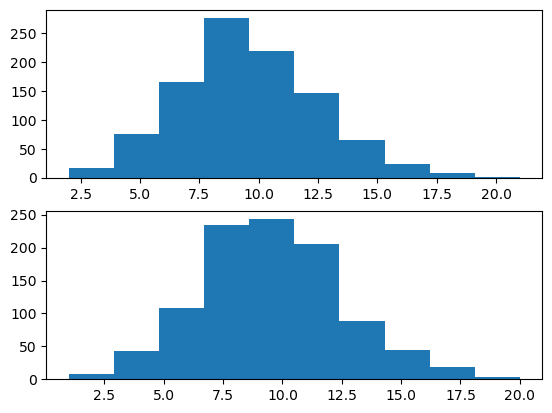

In [19]:
fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax1.hist(p1)
ax2.hist(p2);

#### 평균과 분산의 추정

In [11]:
N = 1000
λ=5
X=np.random.poisson(λ, N)

print(f"평균: {λ}\
      \n평균의 추정치: {np.mean(X)}\
      \n분산: {λ}\
      \n분산의 추정치: {np.var(X)}")

평균: 5      
평균의 추정치: 4.914      
분산: 5      
분산의 추정치: 5.134604


`-` 생각해보니까 이론적으로 평균과 분산의 값이 같아야 한다는 걸 알고 있다. 그런데 왜 추정치가 달라야하나?? 둘 중 하나만 있으면 될 것 같다.

mean(X), var(X)로 $\lambda$를 추정

In [12]:
N = 10000
λ = 5

p1 = [np.mean(np.random.poisson(λ, N)) for i in range(100)]
p2 = [np.var(np.random.poisson(λ, N)) for i in range(100)]

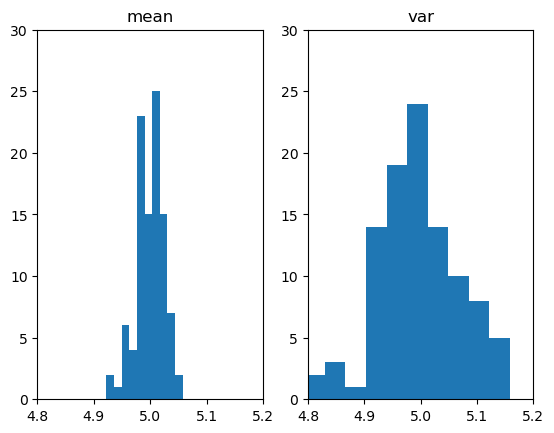

In [13]:
fig, ((ax1), (ax2)) = plt.subplots(1,2)

ax1.set_xlim([4.8, 5.2])
ax2.set_xlim([4.8, 5.2])

ax1.set_ylim([0, 30])
ax2.set_ylim([0, 30])

ax1.hist(p1)
ax2.hist(p2)

ax1.set_title("mean")
ax2.set_title("var");

- 히스토그램을 그려보니까 누가봐도 mean(X)로 λ를 추정하는 것이 var(X)로 λ를 추정하는 것보다 좋아보인다.

- 그냥 평균을 추정한다음 이 값을 평균과 분산이라고 주장하면 안되나? $\Rightarrow$ 된다!! 이게 바로 MLE

## 지수분포 $(X \sim Exp(\lambda))$)

### 지수분포의 요약

- X의 의미: 시간 1에 평균적으로 $\lambda$번 발생하는 사건이 있을 때 첫 번째 이벤트가 발생할 때까지 걸리는 시간.
- X의 범위: 시간은 양수이므로 X $\geq$ 0
- 파라메터의 의미: (1)$\lambda$ = 시간1에 평균적으로 발생하는 이벤트의 수 (2) 1/$\lambda$ = 한번의 이벤트가 발생할 때까지 평균적으로 걸리는 시간
- 파라메터의 범위: $\lambda$>0
- pdf: $f(x) = \lambda e^{- \lambda x}$
- mgf: 
- cdf: $F(x) = 1-e^{-\lambda x}$
- E(X) = $\frac{1}{\lambda}$
- V(X) = $\frac{1}{\lambda ^2}$

### How to generate it?

#### 평균이 10인 지수분포에서 10000개의 샘플을 뽑는 방법

방법1: 모듈 / 방법2: 포아송 프로세스 / 방법3: inverse cdf method

(방법1)

In [57]:
np.random.exponential(10, 10000)

array([ 2.81250688,  3.51950826,  9.34507485, ...,  1.21136792,
       15.43126406, 15.10395178])

(방법2) 포아송 $\rightarrow$ 지수분포 (X), 포아송프로세스 $\rightarrow$ 지수분포 (O)

- 맥도날드에 시간 1당 0.1명씩 평균적으로 방문한다. 1명 방문하는데에는 평균적으로 시간이 10이 걸린다고 볼 수 있음.
- 따라서 언뜻 생각하면 포아송과 지수분포는 역의 관계라서 포아송 분포를 만들고 역수를 취하면 지수분포를 쉽게 만들 수 있을 것 같다.

In [59]:
np.random.poisson(0.1, 10000)

array([0, 0, 0, ..., 0, 0, 1])

- 0이 나온다?
- 생각해보니 포아송은 정수이다. 0이 없다고 쳐도 역수를 취하면 나올 수 있는 값은 1, 1/2, 1/3, 1/4, ... 따위임 지수 분포는 $\frac{1}{0.5}, \frac{1}{1.5}$ 등의 값도 가능해야하는데 포아송은 정수이므로 이러한 역수가 불가능함 (애초에 틀린 접근)
- 아이디어: 극한의 베르누이로 포아송을 만들 때, 몇 번 성공했는지 관심을 가지고 카운팅 했음. $\Rightarrow$ 조금 응용해서 첫 성공까지 몇 번의 시도를 해야하는지 카운팅을 한다고 생각하면 시간 계산이 가능할 것 같다.
- 결국 "포아송분포 $\rightarrow$ 지수분포"로 추출하는 것이 아니라 "포아송프로세스 $\rightarrow$ 지수분포"와 같은 방식으로 추출해야 한다.

In [60]:
# 성공할때까지 시도하는 함수: 성공확률 → 1회 성공까지 시도한 횟수 (기하분포를 뽑는 함수!!)
def try_until_you_succeed(p):
    n_of_try = 0
    u = 0 # uniform
    while u < (1-p): # 실패했다면 / p=0이면 무한 반복
        u = np.random.uniform(0, 1)
        n_of_try += 1
    return n_of_try

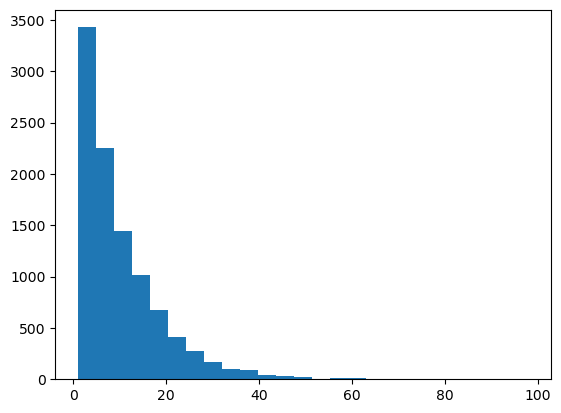

In [64]:
plt.hist([try_until_you_succeed(0.1) for k in range(10000)], bins=25);

In [79]:
N = 10000
λ = 0.1
n = 1000 # n->무한대. 10000이면 20분 넘게 걸려서 1000으로 줄임.
p = λ/n
Δt = (1/n) # 단위가 시간 1이니까 
X = np.array([try_until_you_succeed(p) for k in range(N)]) * Δt

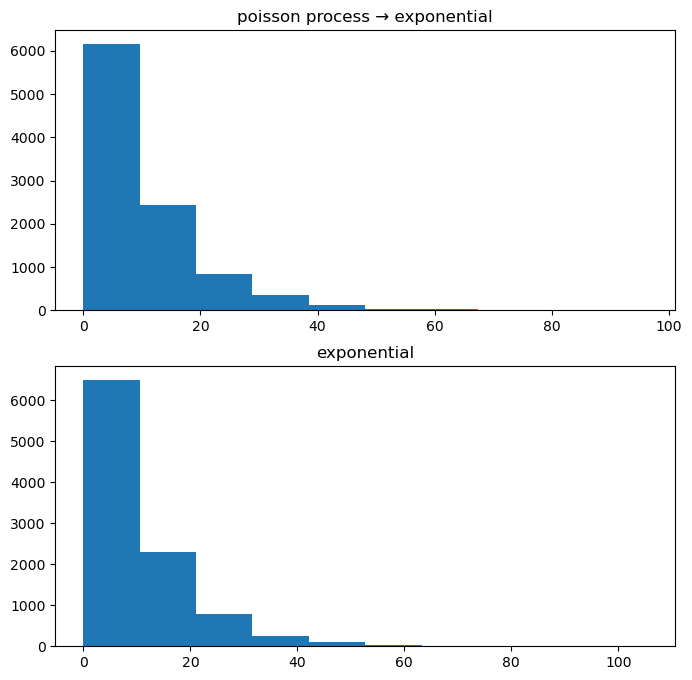

In [82]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize = (8, 8))

ax1.hist(X)
ax2.hist(np.random.exponential(10, N))

ax1.set_title("poisson process → exponential")
ax2.set_title("exponential");

- 불평: 샘플하나뽑는데 시간이 오래걸림. (정확도를 올릴수록 더 오래걸림)

(방법3) inverse cdf method
- 이론적인 pdf를 알고 있다는 전제가 필요
- 자세하게 살펴보자

#### Inverse cdf method를 활용하여 지수분포에서 샘플 추출

- 아래와 같은 2개의 지수분포의 pdf를 고려하자. (평균이 1인 지수분포와 평균이 5인 지수분포)
$$f(x)=e^{-x}$$
$$g(x)=\frac{1}{5}e^{-\frac{1}{5}x}$$

- 각각의 pdf를 그려보면 아래와 같다.

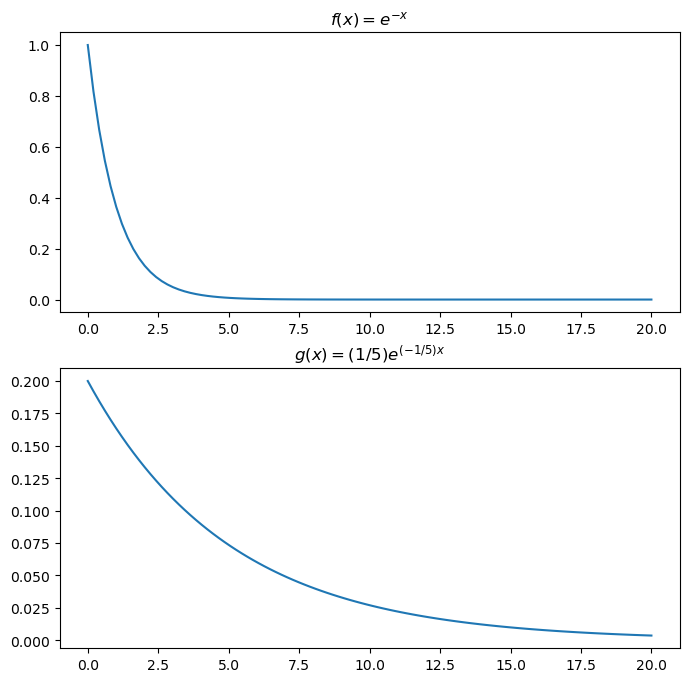

In [133]:
x = np.linspace(0, 20, 100)

def fx(x):
    return np.exp(-1*x)

def gx(x):
    return 1/5 * np.exp(-1/5*x)

fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,8))

ax1.plot(x, fx(x))
ax2.plot(x, gx(x))

ax1.set_title("$f(x)=e^{-x}$")

ax2.set_title("$g(x)=(1/5)e^{(-1/5)x}$");

- 아래 그래프에서 뽑은 값이 더 클 것 같다. (위 그래프는 왼쪽에 몰려있음)

- 이번에는 각각의 cdf를 그려보자.
$$F(x) = \int^x_0f(\tau)d\tau = \int^x_0 e^{-\tau}d\tau=[-e^{-\tau}]^x_0 = 1-e^{-x}$$
$$G(x) = \int^x_0g(\tau)d\tau = \int^x_0 \frac{1}{5}e^{-\tau/5}d\tau=[-e^{-\tau/5}]^x_0 = 1-e^{-x/5}$$

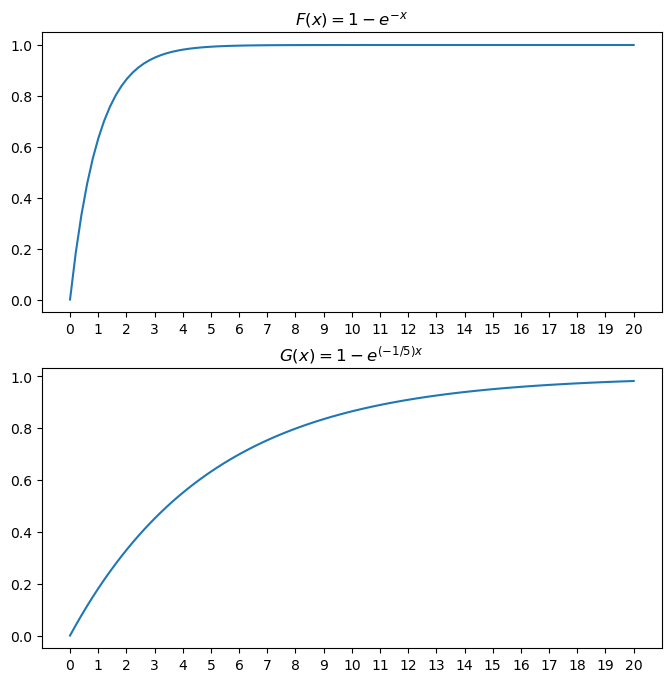

In [113]:
x = np.linspace(0, 20, 100)

def Fx(x):
    return 1-np.exp(-1*x)

def Gx(x):
    return 1-np.exp(-1/5*x)

fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,8))

ax1.plot(x, Fx(x))
ax2.plot(x, Gx(x))

ax1.set_xticks(np.arange(0,21,1))
ax2.set_xticks(np.arange(0,21,1))

ax1.set_title("$F(x)=1-e^{-x}$")
ax2.set_title("$G(x)=1-e^{(-1/5)x}$");

In [130]:
print(f"{1, Fx(1)} 위 그래프에서 약 {round(Fx(1),2)*100}%는 1보다 작다.")
print(f"{5, Fx(5)} 위 그래프에서 약 {round(Fx(5),2)*100}%는 5보다 작다.")

(1, 0.6321205588285577) 위 그래프에서 약 63.0%는 1보다 작다.
(5, 0.9932620530009145) 위 그래프에서 약 99.0%는 5보다 작다.


In [131]:
print(f"{1, Gx(1)} 아래 그래프에서 약 {round(Gx(1),2)*100}%는 1보다 작다.")
print(f"{5, Gx(5)} 아래 그래프에서 약 {round(Gx(5),2)*100}%는 5보다 작다.")

(1, 0.18126924692201818) 아래 그래프에서 약 18.0%는 1보다 작다.
(5, 0.6321205588285577) 아래 그래프에서 약 63.0%는 5보다 작다.


`-` cdf 해석
- 위(평균이 1인 지수분포) = 5정도면 거의 cdf의 값이 1에 가까워짐.
- 아래(평균이 5인 지수분포) = 5정도면 값이 0.63정도임 $\rightarrow$ 100번 뽑으면 5보다 작은게 63개 정도...

`-` cdf의 y축에서 랜덤변수를 발생시킨다음 $\rightarrow \downarrow$와 같이 이동하여 $x$축에 내린다고 생각해보자. (역함수를 구하는 것)
- 위: 대부분 5이하에 떨어짐
- 아래: 약 63% 정도만 5이하에 떨어짐.

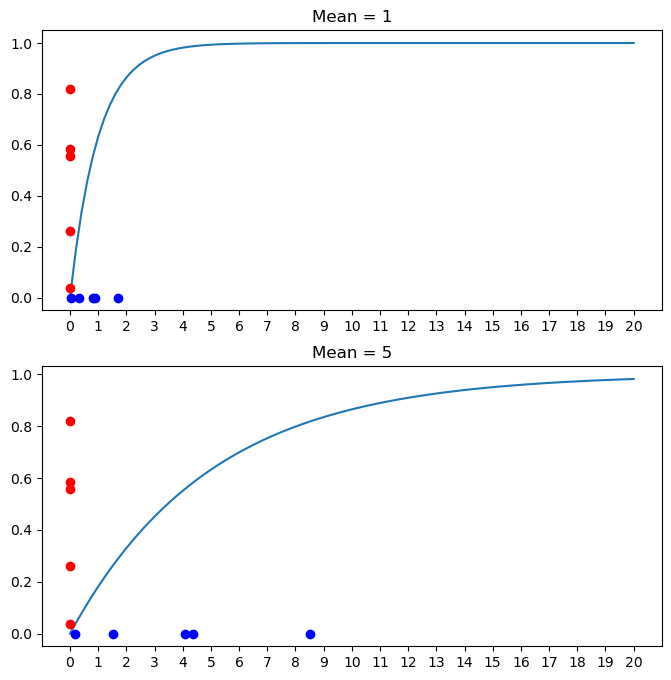

In [150]:
def Finv(x): # 평균이 1인 지수분포 cdf의 역함수
    return -np.log(1-x)

def Ginv(x): # 평균이 5인 지수분포 cdf의 역함수
    return -5*np.log(1-x)

u = np.random.uniform(0,1,5)

fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,8))

ax1.plot(x, Fx(x))
ax1.plot([0,0,0,0,0], u, 'or', )
ax1.plot(Finv(u), [0,0,0,0,0], 'ob')


ax2.plot(x, Gx(x))
ax2.plot([0,0,0,0,0], u, 'or', )
ax2.plot(Ginv(u), [0,0,0,0,0], 'ob')

ax1.set_xticks(np.arange(0,21,1));
ax2.set_xticks(np.arange(0,21,1));

ax1.set_title("Mean = 1")
ax2.set_title("Mean = 5");

- 빨간색: 균등분포
- 파란색: 이게 지수분포 같은데?

##### inverse cdf method 알고리즘 정리

$X_1, X_2, \dots, X_n \overset{iid}{\sim} F$를 생성하고 싶다면?


1. 균등분포에서 $n$개의 난수를 독립적으로 생성한다. 이를 $U_1, U_2, \dots, U_n$이라고 하자.
2. $X_1 = F^{-1}(U_1), X_2 = F^{-1}(U_2),\dots,X_n = F^{-1}(U_n)$ 이라고 놓는다.

- 예제1: inverse cdf를 이용하여 평균이 1인 지수분포 10000개를 생성하여 보자.

(풀이)

Text(0.5, 1.0, 'exponential')

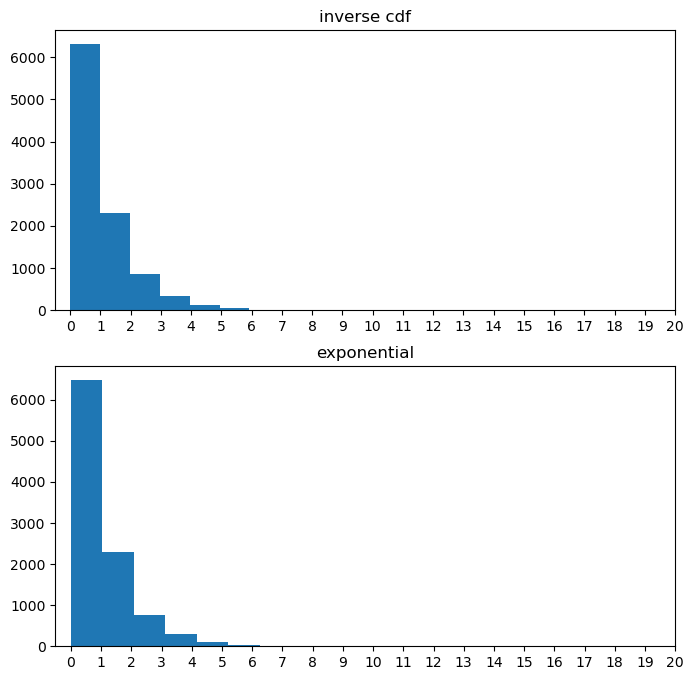

In [161]:
fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,8))

u = np.random.uniform(0,1,10000)
ax1.hist(Finv(u))

ax2.hist(np.random.exponential(1, 10000))

ax1.set_xticks(np.arange(0,21,1));
ax2.set_xticks(np.arange(0,21,1));

ax1.set_title("inverse cdf")
ax2.set_title("exponential")

#### 지수분포의 무기억성

>`-` 수리통계학 책

>- 지수분포 평균은 $\frac{1}{\lambda}$ 인데 수식에서 사용하는 값은 $\lambda$임 계산할 때 주의

>- 이산형 확률분포에서 기하확률변수가 무기억 성질을 갖는 것처럼 연속형 확률변수 중에서는 지수확률변수가 동일한 성질을 지닌다.

>- $X \sim EXP(\frac{1}{\lambda})$ 이면, 양의 실수 $a$와 $t$에 대해서,

>    $$P(X>a+t|X>a) = P(X>t)$$ 

>    가 성립한다.

>    - 위 정리의 의미: 가령, 확률변수 $X$가 어떤 기계부품의 수명이라고 하면, $P(X>a+t|X>a)$는 시점 $a$에서 기계부품의 고장이 없을 때, 최소한 시간 $t$만큼 더 고장이 없을 사건에 대한 확률을 뜻한다. 따라서 정리의 무기억 성질은 변수 $X$가 시점 $a$에서 그동안 기계부품의 고장이 없었다는 조건을 '기억'하지 않고, 앞으로 시간 $t$만큼 더 고장이 없을 것만 고려한다는 것을 뜻하는 것으로, $a$시간만큼 일한 기계부품이 앞으로 $t$시간만큼 더 작동하는 확률이나 새 기계부품이 앞으로 $t$시간 만큼 더 작동하는 확률이나 같다는 것이다.

- 예시
$$P(X>1) = P(X>10|X>9)$$
- 좌변: 시간을 1 기다려서 이벤트가 발생 안 할 확률
- 우변: 시간을 9 기다렸는데 이벤트가 발생 안했음 $\rightarrow$ 시간을 10기다려서 이벤트가 발생 안 할 확률
- 예를들어서 $\lambda = 0.1$이라면 한번 이벤트 발생하는데 평균 시간 10이 걸린다는 의미.
    
    (1) 좌변은 이제 시간 1 기다림. (2) 우변은 시간 9 기다림. 곧 "약속된" 시간 10이 완성됨 $\Rightarrow$ 우변이 더 확률이 크지 않을까? $\Rightarrow$ 아니라는 것!!


- 이해: 지수분포의 근본? 포아송 프로세스
    - 엄청 짧은 시간
    - 엄청 작은 확률
    - 엄청 많은 베르누이 시행이 "독립적"으로 수행 $\rightarrow$ 지금까지 실패했다고 해서 이후에 성공확률이 높아지는건 아님.
    - 우변: 이미 시간 9 동안 무수히 많은 독립적인 베르누이 시행을 놓친상태임. 그 이후의 시행은 모두 독립이므로 좌변의 확률보다 더 크다고 볼 수 없음.

`-` 무기억성 = 과거는 중요하지 않음! $\Rightarrow P(X>1) = P(X>2|X>1) = P(X>3|X>2) = \dots$

#### 몬테카를로 적분

##### 예제1: 아래를 계산하라

$$\int^\infty_0 xe^{-x}dx = ?$$

(손풀이) $\int^\infty_0xe^{-x}dx=??=1$

(손풀이2) $\int^\infty_0xe^{-x}dx= \int^\infty_0x\times e^{-x}dx$ 은 $\lambda=1$인 지수분포의 평균이다. 따라서 답은 1. 

(컴퓨터를 이용한 풀이)

In [4]:
np.mean(np.random.exponential(1, 10000))

1.0033097374284965

##### 예제2: 아래를 계산하라

$$\int^\infty_0 x^2e^{-x}dx = ?$$

(컴퓨터를 이용한 풀이)

In [12]:
np.mean((lambda x: x**2)(np.random.exponential(1,10000)))

2.0209238762363655

- 분산 = 제곱의평균 - 평균의제곱 이므로

    `제곱의평균` = 분산 + 평균의제곱 = $1+1^2$

>### 생략
>##### 예제3: ~
>#### 박스뮬러 변환
>#### $\lambda$에 따른 포아송과 지수분포의 히스토그램 변화 관찰 

## inverse cdf의 이론적 근거

## 어느 사격수 이야기

$$X_1, X_2 \overset{iid}{\sim} N(0,1) \Rightarrow X_1^{2}+X_2^{2}\sim\chi^2(2)$$

$$X_1, X_2 \overset{iid}{\sim} N(0,1) \Rightarrow \frac{1}{2}(X_1^{2}+X_2^{2})\sim Exp(1)$$

- 점추정(모수를 모르는 상태에서 예측하는 것), 구간추정(정확한 점을 예측하기는 어려우니) + 95% 신뢰구간
- 정규분포, 카이제곱, 지수, 감마 분포의 관계

## 정규분포

### 정규분포 요약
- X의 의미:
- X의 범위: $x\in \mathbb{R}$
- 파라메터의 의미와 범위: $\mu$ 평균, $\sigma^2$=분산, $\mu \in \mathbb{R}, \sigma^2>0$
- pdf: $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$
- mgf: 
- E(X): $\mu$
- V(X): $\sigma^2$

### how to generate it?

방법3: (지수분포, 유니폼) → 서로 독립인 2개의 정규분포

#### note 1

- 이론: $X_1, \dots, X_n \overset{iid}{\sim} N(\mu, \sigma^2) \Rightarrow \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\sim N(0,1)$

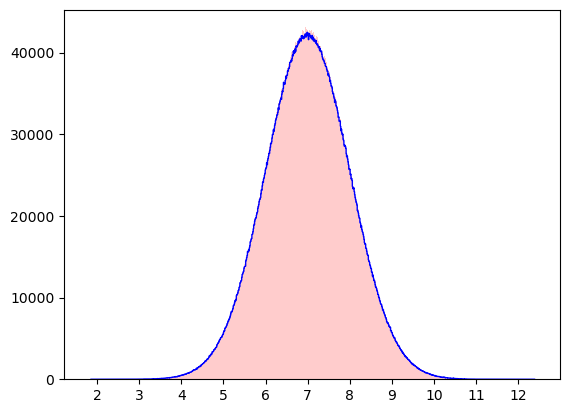

In [28]:
N=10000000
n=25 
σ=5 
μ=7

y1 = [np.mean(np.random.normal(μ,σ,n)) for i in range(N)]
y2 = np.random.normal(μ,σ/np.sqrt(n),N)

plt.xticks(np.arange(1,14,1))
plt.hist(y1, color='blue', bins=1000, histtype='step')
plt.hist(y2, color='red', alpha=0.2, bins=1000);

- 예제1: $\bar{X}$는 분산이  100, 평균이 $\mu$인 분포에서 추출한 크기가 25인 확률표본의 평균이다. 관찰된 표본의 평균이 $\bar{x} = 67.53$일때 $\mu$에 대한 95% 신뢰구간을 구하여라.

(풀이1)

In [32]:
c = np.quantile([np.mean(np.random.normal(0, 10, 25)) for i in range(1000000)], 0.975)
c

3.92342365350967

- 뒷면해석: $X_1,\dots,X_{25} \overset{iid}{\sim} N(0,10) \Rightarrow P(-3.92\leq\bar{X}\leq 3.92) \approx 0.95$ (평균을 0으로 가정한 상황)
- 뒷면해석의 일반화: $X_1,\dots,X_{25} \overset{iid}{\sim} N(\mu,10) \Rightarrow P(\mu-3.92\leq\bar{X}\leq \mu+3.92) \approx 0.95$
- 앞면느낌의 해석: $X_1,\dots,X_{25} \overset{iid}{\sim} N(\mu,10) \Rightarrow P(\bar{X}-3.92\leq\mu\leq \bar{X}+3.92) \approx 0.95$

In [33]:
xbar = 67.53
(xbar-c, xbar+c)

(63.60657634649033, 71.45342365350967)

(풀이2)

In [65]:
n = 25
σ = 10
dist = sps.norm(loc=0, scale=σ/np.sqrt(n))
c = dist.ppf(0.975)
xbar = 67.53
(xbar-c, xbar+c)

(63.610072030919895, 71.44992796908011)

#### note2 (CLT)

- 이론: (1) $X_1,\dots,X_n\overset{iid}{\sim}F$ and (2) $V(X_1)<\infty\Rightarrow\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\overset{d}{\rightarrow}Z, \ \ \ \ Z\sim N(0,1)$

- 뒷부분은 $\bar{X}\overset{d}{\rightarrow}Z', \ \ \ Z'\sim N(\mu, \frac{\sigma}{\sqrt{n}})$로 해석가능

`-` 확인

In [80]:
p = 0.9
N = 10000
n = 50
Xbar = [np.mean(np.random.binomial(1,p,n)) for i in range(N)] # 베르누이

n=500
Ybar = [np.mean(np.random.binomial(1,p,n)) for i in range(N)] # 베르누이

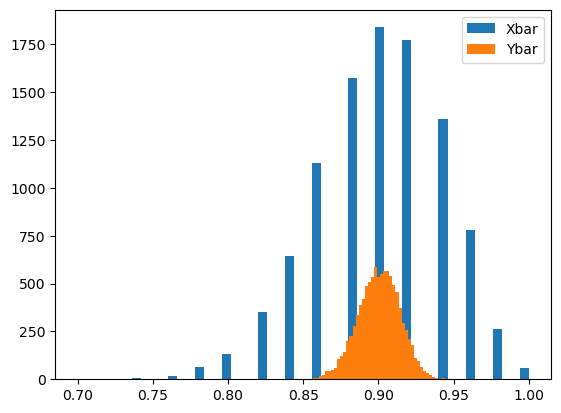

In [87]:
plt.hist(Xbar, bins = 50, label='Xbar')
plt.hist(Ybar, bins = 50, label='Ybar');
plt.legend()

### 가설검정

#### 상황극

`-` 상황
- 동원참치를 좋아하는 자취생이 있었음.
- 그런데 양이 적었음.
- 캔의 뒷면을 보니까 중량이 45g이라고 함.

`-` 의심
- 아무리봐도 참치캔의 무게가 45g보다 적은 것 같음.

`-` 문의
- (문의) 참치캔이 45g보다 적다. $\to$ (답변) 참치캔의 무게 $\sim N(45, 1)$
- (생각) 참치캔의 무게는 확률분포라는 것을 따르기 때문에 항상 45g이 아니고 45g보다 작을 수 있다는 논리
- (화남) 그러니까 내가 좀 운이 없는 편인 것이지 우리회사 잘못이 아니란 이야기

`-` 실험
- 아무리 생각해도 미심쩍어서 한 박스(30개가 들어가 있음)를 사서 모두 무게를 재보았다.
- 30개 평균무게를 계산하니까 44.50이었다.

`-` 고민
- 실험결과가 44.50g이 나와봤자 확률변수라는 논리로 또 다시 방어가 가능할 듯 하다.
- 참치회사에 항의해봤자 "고객님께서 운이 좀 많이 없는 케이스셔요" 라고 둘러댈 것 같다.

#### 해결방법

`-` 아이디어

- 가만히 생각해보니까 참치캔의 무게가 10g이 나와도 운이 없다고 둘러대면 그만일 것 같다. 참치회사 입장에서는 거의 기적의 논리인 셈.
- 내가 얼마나 운이 없는 케이스인지 정확한 확률로 계산해보자. $\to$ 참치회사의 주장이 참이라고 가정하자. 그리고 그 세계에서(참치회사의 주장이 참인 세계에서) 나보다 운이 없는 케이스가 14,000,605의 경우의 수 중에서 몇개나 발생했는지 알아보자.
- 만약에 14,000,605의 경우의 수 중에서 나보다 운이 없는 케이스가 0명이라면? 이건 참치회사가 거짓말을 하고 있다고 생각해도 무방하다.

In [6]:
np.random.normal(45,1) # 참치캔 하나의 무게

45.65559226000502

In [7]:
g = np.random.normal(45,1,30) # 참치캔 30개의 무게들
g

array([44.44060247, 44.58578509, 45.18637014, 42.88182346, 43.44174295,
       45.31328539, 44.61031359, 44.35194961, 43.66617982, 44.05899114,
       44.79021104, 46.45200423, 44.9289538 , 44.72000347, 46.99494376,
       44.79112521, 46.8076755 , 44.83231809, 45.64099509, 46.78136459,
       41.87449512, 44.6893391 , 45.36937168, 43.9631011 , 46.32436898,
       44.33644491, 46.91034175, 46.02706234, 43.36750549, 46.23646942])

In [8]:
np.mean(g) # 참치캔 30개의 무게의 평균

44.94583794428206

In [12]:
np.mean(np.array([np.mean(np.random.normal(45,1,30)) for i in range(14000605)]) < 44.50) # p-value

0.0030819382448115636

`-` 자취생의 반론
- 보세요! p-value가 0.05만 되었더라도 내가 운이 매우 나쁜 케이스인가보다 하고 넘어가려고 했어요. 그런데 내가 $p$-value를 계산했는데 0.003이에요. 이건 너무 낮은 확률입니다. 그래서 저는 당신들이 사기친다고 볼 수 밖에 없어요!

#### 이론

`-` 통계학과 교수님 등장

- 자취생의 말은 이론적으로 옳다.

참치회사의 주장을 $H_0$라고 하고, 학생의 주장을 $H_1$이라고 하자.

$$H_0:\mu=45$$
$$H_1:\mu<45$$

자취생은 $X_i\sim N(\mu,1)$에서 30개의 샘플을 얻어서 평균을 구했으며 이때 평균값은 $\bar{x}=44.5$이다. 참치회사의 주장이 맞다는 전제하에서 자취생보다 더 극단적인 $\bar{x}$를 얻을 확률은 아래와 같다.
$$P(\bar{X}\leq 44.5|H_0 \  \text{is true}) = P(\bar{X}\leq 44.5|\mu=45)$$

우변의 식을 정리하면

$$P(\bar{X}\leq 44.5|\mu=45) = P(\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\leq\frac{44.5-\mu}{\sigma/\sqrt{n}}\bigg|\mu=45)$$

우선 $\sigma=1$이고 참치회사의 주장이 맞다고 전제하였으므로 $\mu=45$. $n$은 한 박스에 포함된 참치캔의 수이므로 이 경우는 $n=30$이다. 따라서 $\frac{44.5-\mu}{\sigma/\sqrt{n}}\approx-2.73861$이다. 한편 $\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\sim N(0,1)$ 이므로 (note1의 내용) 구하는 확률 얻기 위해서는 단지 아래만 계산하면 된다.

$$P(Z\leq-2.73861), \ Z\sim N(0,1)$$

이 확률은 대략적으로 0.00308 인데 이것은 자취생이 시뮬레이션으로 얻은 0.00306와 거의 비슷하다.

In [17]:
μ=45
σ=1
n=30 
dist = sps.norm(loc=0, scale=1)
dist.cdf((44.5-μ)/(σ/np.sqrt(n)))

0.00308494966027208

(보충학습)

In [18]:
dist = sps.norm(loc=0, scale=1)
dist.cdf(0) #P(X≤0), where X ~ N(0,1)

0.5

In [19]:
dist = sps.norm(loc=0, scale=1)
dist.cdf(1.96) #P(X≤1.96), where X ~ N(0,1)

0.9750021048517795

#### 2차 공방
`-` 이론의 회피
- (참치회사) 이후에 저희가 추가 조사해보니까 참치캔의 분포가 딱 정규분포를 따르진 않더라고요?
- (참치회사) 그런데 교수님의 논리전개는 정규분포라는 가정하에 성립하니까 우리의 추가조사 결과에는 적용할 수 없을 것 같다.

`-` 카운터
- 중심극한정리에 의하여 분포상관없이 적당한 $n$이 보장되기만 한다면 자취생의 시뮬레이션 결과와 교수님의 주장은 여전히 유효하다.

#### 숙제
- 자취생의 샘플이 $\bar{x}=44.5$가 아니라 $\bar{x}=44.8$이었다고 할 때 p-value를 구해보라.

In [28]:
Z = (44.8-45)/(1/np.sqrt(30))
dist = sps.norm(loc=0, scale=1)
dist.cdf(Z) # 0.136

0.13666083914614557

### note3: delta method (생략)

### 위치모수와 척도모수

`-` 정규분포 특징

- 이론: $Z\sim N(0,1) \Rightarrow aZ+b \sim N(b,a^2)$

- 생각보다 이거 엄청 신기한 기능이에요

- 정규분포에 어떠한 상수를 더해도 정규분포, 어떠한 상수를 곱해도 정규분포, 더하고 곱해도 정규분포!

`-` 위치모수, 척도모수

1. 확률변수 $Z$가 분포 A를 따를 때 $Z+b$도 분포 A를 따름 $\Rightarrow$ 분포A는 위치모수를 가짐

2. 확률변수 $Z$가 분포 B를 따를 때 $aZ$도 분포 B를 따름 $\Rightarrow$ 분포A는 척도모수를 가짐

3. 확률변수 $Z$가 분포 C를 따를 때 $aZ+b$도 분포 C를 따름 $\Rightarrow$ 분포A는 위치모수와 척도모수를 가짐

`-` 예시:

- 분포C: {{정규분포, 균등분포, 로지스틱, 이중지수, 코쉬}}

- 분포A: 분포C와 동일

- 분포B: 분포C $\cup$ {{지수분포, 감마분포}}

- 분포C - 분포A: 없다고 생각하세요..

- 분포C - 분포B: {{지수분포, 감마분포}}

(예제1)

(예제2)

(예제3)

.
.
.
.


## 카이제곱분포: $X\sim \chi^2(k)$

### motive

(예제) $X_i\overset{iid}{\sim}N(7,\sigma^2)$일 때 아래를 test 하고 싶다고 하자
$$H_0: \sigma^2=4$$
$$H_1: \sigma^2<4$$
30개의 샘플을 확보하여 $\xi=\frac{1}{30}\sum^{30}_{i=1}(x_i-7)^2$를 계산하였으며 계산결과 $\xi=2.72$가 나왔다고 하자. $p$-value를 구하여라.

(풀이1)

In [2]:
xis = [np.mean((np.random.normal(7,2,30)-7)**2) for i in range(14000605)]

In [4]:
np.mean(np.array(xis)<2.72)

0.09435406541360176

- 생각보다 나올법한 확률이다.

`-` 분산이 4가 아닌 것 같다라고 주장하기 위해서는 (95%)

In [6]:
np.quantile(xis, 0.05)

2.4653042700709666

- 2.46보다 같거나 작아야한다.

(풀이2)

$\xi = \frac{1}{30}\sum^{30}_{i=1}(x_i-7)^2$는 어떠한 분포A에서 발생한 샘플이라고 볼 수 있다. 그 A의 분포를 이론적으로 잡아보자.

- 이론: $\sum^n_{i=1}Z_i^2\sim\chi^2(n)$, where $Z_i\overset{iid}{\sim}N(0,1).$ 이러한 이론이 있다.

- 관찰: 우리예제의 경우에는 $H_0$가 참이라는 가정하에 $\sum^{30}_{i=1}(\frac{X_i-7}{2})^2\sim\chi^2(30)$

- 주장: $\xi\times\frac{30}{4}=\sum^{30}_{i=1}(x_i-7)^2$는 $\chi^2(30)$에서 뽑힌 샘플이다.

In [9]:
xi = 2.72

xi*30/4

20.400000000000002

In [11]:
dist = sps.chi2(30)
dist.cdf(xi*30/4) # 시뮬레이션 값과 비슷

0.09429163377738799

`-` 분산이 4는 아닌 것 같다라고 주장하려면? (95%)

In [15]:
dist.ppf(0.05)

18.492660981953467

$\xi \times 30/4 = 18.492660981953467$라는 말이니까

In [16]:
dist.ppf(0.05) / 30 * 4

2.465688130927129

- 2.46보다 같거나 작아야한다. (위와 동일)

### 카이제곱 분포 요약

- X의 의미: 서로 독립인 표준정규분포의 제곱합
- X의 범위: $x\in (0,\infty)$
- 파라메터의 의미: $k$는 자유도, 표준정규분포 제곱을 몇개 합쳤는지...
- 파라메터의 범위: $k=1,2,3,4,\dots$
- pdf:
- mgf:
- E(X): $k$
- V(X): $2k$

### 대의적 정의

- $X\sim\chi^2(k)\Leftrightarrow X \overset{d}{=} Z_1^2+\dots+Z^2_k$, where $Z_i\overset{iid}{\sim}N(0,1)$

### How to generate it?

#### 자유도가 4인 카이제곱분포에서 100개의 샘플을 얻는 방법

(방법1)

In [5]:
np.random.chisquare(4, 100)[:5]

array([4.23661203, 2.77348336, 5.43154643, 1.84772286, 2.23430818])

(방법2) 정규분포 $\rightarrow$ 카이제곱분포

In [4]:
[np.sum(np.random.normal(0,1,4)**2) for i in range(100)][:5]

[0.9470195437591595,
 3.1040636594475677,
 2.2264229504547757,
 5.070560026199548,
 5.5961173298844225]

(방법3) 지수분포 $\rightarrow$ 카이제곱분포

- 복습: $X, Y \overset{iid}{\sim} N(0,1) \Rightarrow R^2/2 \sim Exp(1)$, where $R^2 = X^2+Y^2$

- 즉, $2 \times \frac{R^2}{2} + 2 \times \frac{R^2}{2} = Z_1^2 + Z_2^2 + Z_3^2 + Z_4^2 \sim \chi^2(4)$

In [3]:
[np.random.exponential(1)*2 + np.random.exponential(1)*2 for i in range(100)][:5]
#표준정규분포를 4개 더한 것

[1.8829768607694999,
 0.9336651649834132,
 5.965820376025277,
 0.8428830673590306,
 8.645433131925193]

In [2]:
[np.random.exponential(2)+np.random.exponential(2) for i in range(100)][:5]
#지수분포는 scale parameter를 가지기 때문에.

[0.8591426263189498,
 5.769427223696833,
 7.027424120087312,
 4.539451879434549,
 4.229829641106975]

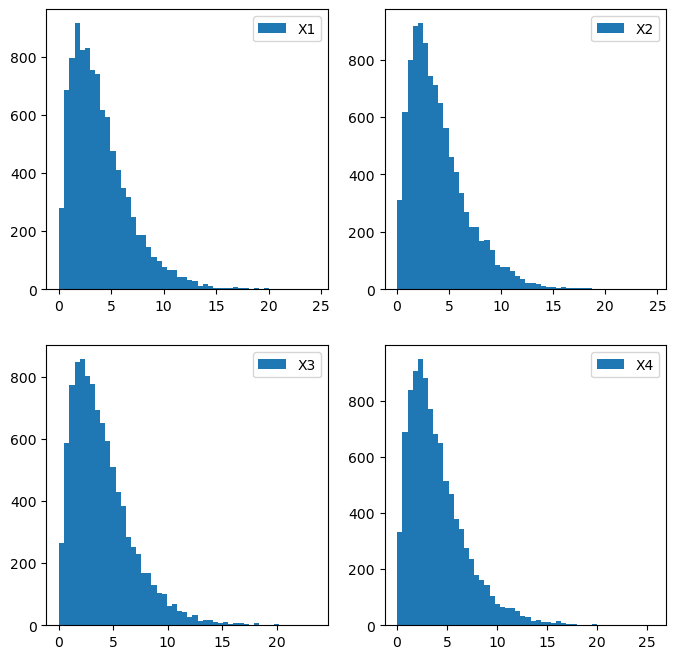

In [33]:
N=10000
X1 = np.random.chisquare(4, N)
X2 = [np.sum(np.random.normal(0,1,4)**2) for i in range(N)]
X3 = [np.random.exponential(1)*2 + np.random.exponential(1)*2 for i in range(N)]
X4 = [np.random.exponential(2) + np.random.exponential(2) for i in range(N)]

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.hist(X1, label='X1', bins=50)
ax2.hist(X2, label='X2', bins=50)
ax3.hist(X3, label='X3', bins=50)
ax4.hist(X4, label='X4', bins=50)

ax1.legend(); ax2.legend(); ax3.legend(); ax4.legend()

`-` 정리하면 아래와 같이 된다.

- $Y \sim \chi^2(4)$

- $Y \overset{d}{=}Z_1^2+Z_2^2+Z_3^2+Z_4^2$, where $Z_i\overset{iid}{\sim}N(0,1)$

- $Y \overset{d}{=}2\frac{Z_1^2+Z_2^2}{2}+2\frac{Z_3^2+Z_4^2}{2}$, where $R^2_i/2\overset{iid}{\sim}Exp(1)$

- $Y \overset{d}{=} X_1 + X_2$, where $X_1, X_2 \overset{iid}{\sim}Exp(2)$ 마지막은 척도모수와 관련된..?

`-` 자유도가 6인 카이제곱분포
- 표준정규분포 6개를 제곱하여 합친것과 같다.
- 평균이 2인 지수분포 3개를 합친것과 같다.

`-` 자유도가 k인 카이제곱분포
- 표준정규분포 k개를 제곱하여 합친것과 같다.
- 평균이 2인 지수분포 k/2개를 합친것과 같다. (?) $\to$ 감마분포의 모티브 

### note: 표본분산의 분포

- 이론: $X_1,\dots,X_n\overset{iid}{\sim}N(0,1) \Rightarrow \frac{(n-1)S^2}{\sigma^2}\sim \chi^2(n-1)$
- 나중에 다시 다룸..

### 카이제곱 분포의 합
- 이론: $X\sim\chi^2(k_1), Y\sim\chi^2(k_2), X\bot Y \Rightarrow X+Y \sim \chi^2(k_1+k_2) $

### 히스토그램

- 자유도가 2인 카이제곱 = 평균이 2인 지수분포

- 카이제곱은 자유도가 커질수록 대칭이 되어간다.

- 중심의 위치는 자유도의 값과 비슷

## 감마분포: $X\sim\Gamma(\alpha, \beta)$

### 감마분포 요약
- X의 의미: 서로 독립인 지수분포를 $\alpha$개 합친 것, 시간 1에 평균적으로 $\lambda$번 발생하는 사건이 있을 때 $\alpha$번째 사건이 발생할 때까지 걸리는 시간

- X의 범위: $x\in(0,\infty)$

- 파라메터의 의미: $\alpha=$지수분포를 더한 횟수(의 확장버전), $\beta=\frac{1}{\lambda}=$지수분포의 평균

- 파라메터의 범위: $\alpha>0, \beta>0$

- pdf: $\frac{1}{\Gamma(\alpha)\beta^\alpha}x^{\alpha-1}e^{-x/\beta}$

- mgf: 

- E(X): $\alpha\beta$

- V(X): $\alpha\beta^2$

### 대의적 정의($\alpha$가 자연수일 경우)
- $X\sim\Gamma(\alpha,\beta)\overset{d}{\Leftrightarrow}Z_1+\dots+Z_\alpha$, where $Z_i\overset{iid}{\sim}Exp(\frac{1}{\beta})$

- $Exp(\frac{1}{\beta})$는 평균이 $\beta$인 지수분포

### how to generate it?
#### $\Gamma(3,2)$를 1000개 생성하라.

In [8]:
a=3
b=2

(방법1)

In [39]:
np.random.gamma(a, b, 1000)[:5]

array([ 9.71933815,  7.99068886,  7.56259455, 14.96478038,  7.9842099 ])

(방법2) 지수분포 → 감마분포

In [40]:
[np.sum(np.random.exponential(b, a)) for i in range(1000)][:5]

[2.206747933276282,
 10.457792034901699,
 11.763758964906064,
 9.883464276208098,
 8.29207809727784]

(방법3) 표준정규분포 이용

In [9]:
[np.sum(np.random.normal(0,1,2*a)**2) for i in range(1000)][:5]
# 방법3이 가능한 이유는 2a가 현재 자연수이고, b=2 이기 때문.

[1.534278807696258,
 3.106678006479342,
 4.081251489899774,
 15.071812425431794,
 6.94872725696303]

(방법4) 카이제곱분포 이용

In [42]:
np.random.chisquare(2*a, 1000)[:5]
# 방법4가 가능한 이유는 2a가 현재 자연수이고, b=2 이기 때문.

array([ 2.7665365 , 10.11844372,  3.20742109,  4.76564108, 10.56994416])

`-` 확인

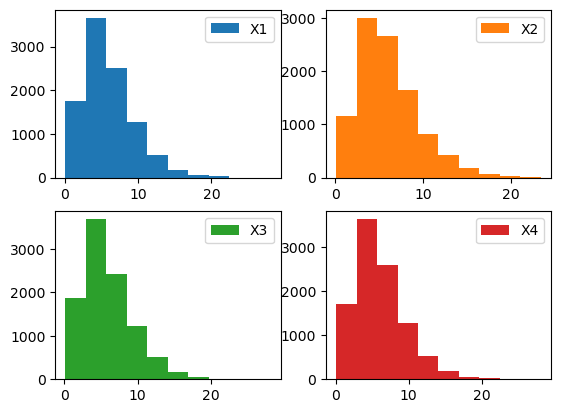

In [18]:
N=10000
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.hist(np.random.gamma(a, b, N), label = 'X1')
ax2.hist([np.sum(np.random.exponential(b, a)) for i in range(N)], label = 'X2', color='C1')
ax3.hist([np.sum(np.random.normal(0,1,2*a)**2) for i in range(N)], label = 'X3', color='C2')
ax4.hist(np.random.chisquare(2*a, N), label = 'X4', color='C3')

ax1.legend(); ax2.legend(); ax3.legend(); ax4.legend()

### 감마분포와 카이제곱분포의 관계

`-` 이론: $X\overset{d}{=}Y,$ where $X\sim\chi^2(k)$ and $Y\sim\Gamma(\frac{k}{2},2).$

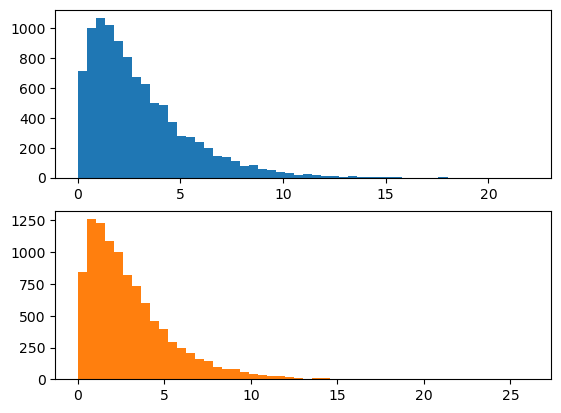

In [15]:
k=3

fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax1.hist(np.random.chisquare(k, 10000), bins=50)
ax2.hist(np.random.gamma(k/2, 2, 10000), bins=50, color='C1');

### 척도모수

`-` 감마분포도 척도모수를 가짐

- 감마분포의 곱셈을 해도 감마분포가 된다

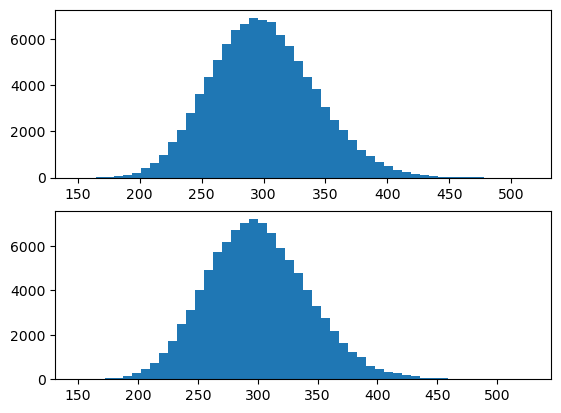

In [38]:
fig, ((ax1, ax2)) = plt.subplots(2,1)

ax1.hist(np.random.gamma(50,6, 100000), bins=50)
ax2.hist(np.random.gamma(50,2, 100000)*3, bins=50);

### 감마분포의 합

`-` 이론: $X\sim\Gamma(\alpha_1,\beta), Y\sim \Gamma(\alpha_2, \beta), \ \  X\bot Y \Rightarrow X+Y\sim \Gamma(\alpha_1 + \alpha_2, \beta)$

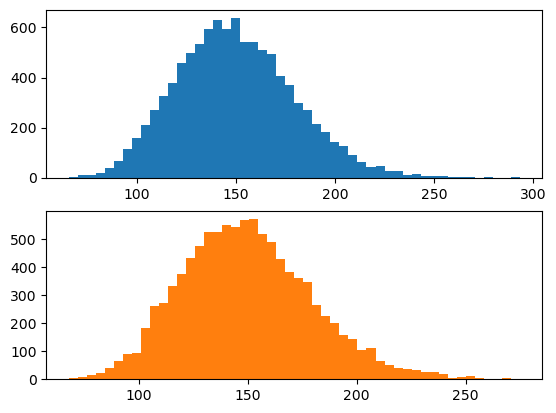

In [44]:
fig, ((ax1, ax2)) = plt.subplots(2,1)

ax1.hist(np.random.gamma(25,6, 10000), bins=50)
ax2.hist(np.random.gamma(6,6, 10000)+np.random.gamma(25-6, 6, 10000), bins=50, color='C1');

## 지수분포의 다양한 표현

`-` 지수분포는 다양하게 표현된다.

- 경우1: $X\sim Exp(\theta), f(x)=\frac{1}{\theta}e^{-\frac{x}{\theta}}$

- 경우2: $X\sim Exp(1/\lambda), f(x)=\lambda e^{-\lambda x}$

- 경우3: $X\sim Exp(\lambda), f(x)=\lambda e^{-\lambda x}$

`-` 기억할 것

- 경우1: 지수분포의 모수는 평균, 지수분포의 파라메터는 $\theta = \frac{1}{\lambda}$ 으로 정의하여 새롭게 사용

- 경우2: 지수분포의 모수는 평균, 지수분포의 파라메터는 포아송의 $\lambda$ 를 재활용

- 경우3: 지수분포의 모수는 평균의 역수, 지수분포의 파라메터는 포아송의 $\lambda$ 를 재활용.


`-` 노테이션의 숨은 의도들 (교수님 생각)

- 경우2: 포아송분포의 파라메터도 그대로 쓰고 싶고, "지수분포의 모수 = 지수분포의 평균"과 같이 만들고 싶음

- 경우1: 경우2에서는 $X\sim Exp(1/\lambda)$ 로 표현되어서 모수가 역수로 되어있어 헷갈림. 그냥 포아송분포의 $\lambda$ 를 버리는 편이 좋겠음. 지수분포의 평균을 의미하는 $\theta$ 를 새롭게 정의하고 이 $\theta$ 를 중심으로 pdf를 만듦

- 경우3: 경우2에서는 $X\sim Exp(1/\lambda)$ 로 표현되어서 모수가 역수로 되어있어 헷갈림. 그냥 모수는 그대로 $Exp(\lambda)$ 를 쓰고 지수분포의 평균을 모수의 역수로 정의하는 것이 좋겠음.


`-` 아무튼 여러가지 방식으로 표현합니다.

- 경우1: 줄리아, 파이썬, 위키

- 경우2: 교수님께서 공부한 교재. 요즘은 이렇게 잘 안쓰는 것 같음

- 경우3: R, 위키

`-` 교수님께서는 평균이 314인 지수분포의 pdf는 $f(x) = \frac{1}{314} e^{-x/314}$ 이다 ← 이렇게 외우셨다고 함

#### 숙제

`-` 평균이 2인 지수분포를 이용하여 자유도가 20인 카이제곱분포를 생성하여라

- $\Gamma (\frac{\alpha}{2}, 2) = \chi^2(\alpha)$ 이므로 $\alpha$에 20을 대입하면 $\Gamma (10, 2) = \chi^2(20)$

    따라서 평균이 2인 지수분포 10개의 합이다.

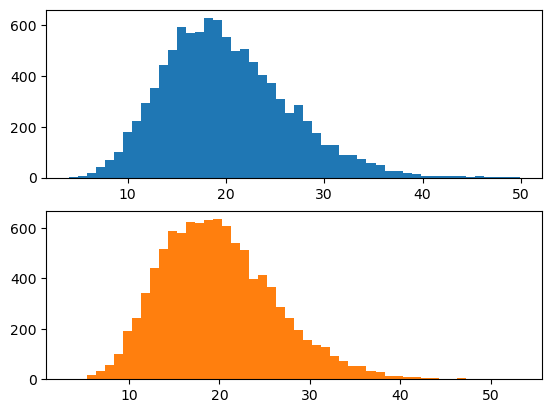

In [50]:
ax1, ((ax1), (ax2)) = plt.subplots(2,1)

ax1.hist([np.sum(np.random.exponential(2, 10)) for i in range(10000)], bins=50)
ax2.hist(np.random.chisquare(20, 10000), bins=50, color='C1');

---

## 참고: 검정의 형식 논리

`-` 검정을 진행하는 방법은 아래와 같다.

- 기: 누군가가 (혹은 세상이) $H_0$가 참이라고 주장한다. 나는 $H_1$이 참인 것 같다.
- 승: 누군가와 (혹은 세상과) 싸우기 위하여 샘플을 수집하고 검정통계량을 구한다.
- 전: 검정통계량의 분포를 잡아내서 $p$-value를 계산한다. 이 $p$-value는 "니가 틀렸겠지"라는 주장에 대한 카운터.
- 결: $H_0$가 참일지 $H_1$이 참일지 판단. 절대적인 기준은 없음. (하지만 굉장히 보수적인 사람이라도 $p$-value가 0.05보다 작으면 $H_1$이 참이라고 인정)

`-` 포인트는 검정통계량의 분포를 잡아내는 것인데, $H_0$가 참이라는 전제하에 시뮬레이팅 해도 되고 이론적인 분포를 손으로 유도해도 된다.

- 당연히 컴퓨터가 없던 시절에는 시뮬레이팅이 불가능했으므로 "이론적으로 유도 + 통계표(?)"를 이용해서 $p$-value를 계산해야 했다.

`-` 다양한 분포를 공부하는 이유? 검정통계량의 이론적 분포를 잡아내기 위해서!+  $\alpha$

- 카이제곱분포를 왜 공부해야? 정규분포를 따르는 샘플의 분산을 test하기 위해서! +  $\alpha$

---

`!` p-value 관련하여 내가 정리해보기.

- 귀무가설 H0: 연구자가 테스트하고자 하는 가설을 부정하는 가설. 무작위로 발생한 것이라고 가정
- 대립가설 H1: 귀무가설을 기각하고자 하는 가설. 보통은 연구자의 주장이나 가설

- p-value는 **귀무가설이 사실일 확률**을 나타낸다. 그 값이 낮을수록 귀무가설을 기각하는 경향이 강해진다. 보통은 특정 유의수준($\alpha$)보다 작은 p-value를 가지면 귀무가설을 기각한다. 유의수준은 0.05나 0.01이 많이 사용된다.

- 예를 들어, 우연히 어떠한 값이 나왔을 때 이 값과 같거나 더 **극단적인 값이 나올 확률**이 p-value이다. 예를들어 p-value가 0.04이 나왔다고 했을 때 이 값은 가정한 분포에서 우연히 나올 확률이 4%라는 것이고, 랜덤으로 이러한 극단적인 값이 나올 확률이 매우 낮으므로 통계적으로 유의하다고 볼 수 있다.(유의수준을 0.05(5%)로 설정한 경우에. 만약 유의수준을 0.01로 설정하였다면 이 값은 유의하지 않다.)

`!` 검정의 종류와 목적 관련하여 내가 정리해보기.

1. t-test: **평균값의 차이**를 비교하는 데 사용.(보통 **2개**의 그룹 비교) 모집단의 분포가 정규분포를 따르고 등분산성을 만족할 때 사용된다. 
2. 카이제곱$\chi^2$ 검정: **정규분포를 따르는 샘플의 등분산성**을 검정 / 범주형 변수 간의 관계를 검정하는 데 사용(관측된 빈도가 기대 빈도와 유의하게 다른지/두 변수가 독립적인지)
3. 회귀분석: 변수간의 관계를 검증. 종속변수(Y)와 하나이상의 독립변수(X)간의 관계를 모델링하고 예측
4. 상관분석: 두 변수 간의 관계의 강도와 방향을 확인하는 데 사용

- ANOVA (Analysis of Variance): **평균값을 비교**하는 데 사용(**3개 이상**의 그룹 비교) 일반적으로 F-통계량을 사용
- 비모수 검정: 데이터가 정규분포를 따르지 않거나 등분산성을 만족하지 않을 때 사용
- 생존분석: 사건이 발생하는 시간을 분석하는 데 사용. 생존 시간이나 사건 발생률을 비교하여 그룹 간의 차이를 확인

## 분포 간의 관계식 총정리

...